* train / test csv를 두개로 나누고 시작.

In [77]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

from sklearn import tree
from sklearn.model_selection import train_test_split

# # matplotlib 출력이 Jupyter Notebook 내에 온라인으로 표시되도록 설정
# %matplotlib inline
# # seaborn 스타일로 설정
# sns.set()

In [78]:
df_train = pd.read_csv(r"C:\Users\CDL\Desktop\[moon]2\song\05_실습\Dt_tit\train.csv")
df_test = pd.read_csv(r"C:\Users\CDL\Desktop\[moon]2\song\05_실습\Dt_tit\test.csv")

In [82]:
df_test = df_test['Survived']

KeyError: 'Survived'

In [80]:
df=pd.concat(['df_train,df_test'])

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

In [3]:
print(df_train.shape)
df_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
print(df_test.shape)
df_test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

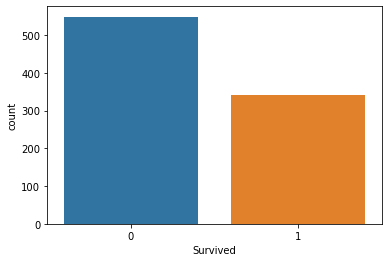

In [55]:
sns.countplot(x='Survived',data=df_train) #특성 시각화 확인 (0사망,1생존)
# 데이터의 편차가 너무 큼 (이
# 이러한 데이터 보다는 비슷한 데이터를 가지고 오는게 중요)

<AxesSubplot:xlabel='Sex', ylabel='count'>

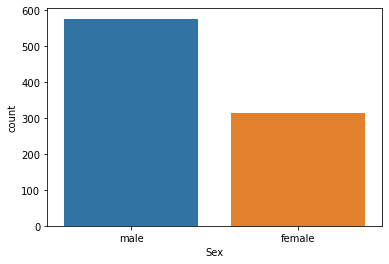

In [56]:
sns.countplot(x='Sex', data=df_train) #sex 합계 

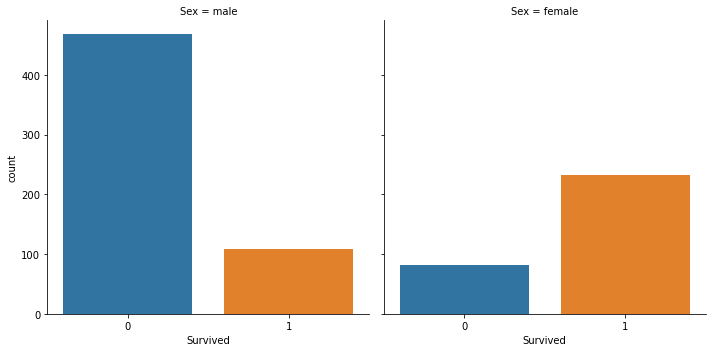

In [57]:
sns.catplot(x='Survived',col='Sex',kind='count',data=df_train)
# 여성이 많이 생존

In [58]:
df_train.groupby(['Sex']).Survived.sum() # 합계 

Sex
female    233
male      109
Name: Survived, dtype: int64

In [59]:
print(df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex =='female'].Survived.count())
# 74% (생존자여성) / 전체여성     =  전체여성중에 생존자의 비중 

0.7420382165605095


In [60]:
df_train[df_train.Sex == 'female'].Survived.sum()
# 생존여성

233

In [61]:
df_train[df_train.Sex =='female'].Survived.count() 
# 전체여성

314

In [62]:
print(df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex =='male'].Survived.count())

0.18890814558058924


In [63]:
print(df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex =='female'].Survived.count())
print(df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex =='male'].Survived.count())
# 성별에 따른 생존 확률

0.7420382165605095
0.18890814558058924


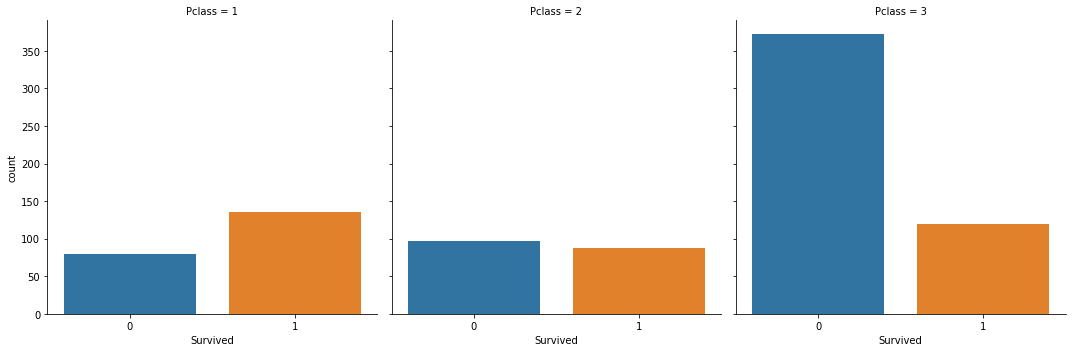

In [64]:
sns.catplot(x='Survived', col='Pclass', kind='count', data=df_train)
#pclass별 생존자의 수 시각화

# 전처리 (결측치)
## 훈련,테스트 데이터 합치기

In [65]:
survived_train = df_train.Survived # survived 칼럼 따로 저장.(타겟값 정답)
survived_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [66]:
data = pd.concat([df_train.drop(['Survived'],axis=1),df_test])
data.head()
# 트레인에서 Survived열을 제거하고, 테스트에 합쳐 저장.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
data.info() 
# Fare: 운임
# Cabin: 객실
# Embarked: 승선지 '결측치 확인' 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


# datatype별 결측치 채우기 (float64 소숫점)

In [68]:
data['Age'] = data.Age.fillna(data.Age.median())
data['Fare'] = data.Fare.fillna(data.Fare.median())


# Age의 결측값을 Age에 ,Fare의 결측값을 Fare에 중위값 채운다. 
# Age열의 중위값 Fare의 결측값에 채움.
# 모르는 비어져있는값에 중위값을 채운다. 
# 중위값은 결국 "정렬"이 되어야 함. 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [69]:
data['Fare'].info() 

<class 'pandas.core.series.Series'>
Int64Index: 1309 entries, 0 to 417
Series name: Fare
Non-Null Count  Dtype  
--------------  -----  
1309 non-null   float64
dtypes: float64(1)
memory usage: 20.5 KB


In [70]:
data[['Fare', 'Age']].info()
# 왜 하필 Fare와 Age였냐면 둘다 float 숫자열이기 때문임. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fare    1309 non-null   float64
 1   Age     1309 non-null   float64
dtypes: float64(2)
memory usage: 30.7 KB


# datatype별 결측치 채우기 (object 문자열)
## string->0,1 

In [71]:
import pandas as pd
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
data.head()
# pd.get_dummies : 범주형 열을 ->이진(dummy)변수로 반환
# columns=['Sex'] 이 열만 이진 변수
# drop_first=True 첫번째 카테고리 빼고 나머지 인코딩 
# 'Sex' 제거 열을 원-핫 인코딩(one-hot encoding)하여 더미 변수로 변환

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [72]:
data = data[['Sex_male','Fare','Age','Pclass','SibSp']]
data.head()
# 필요한 컬럼만 봅아서 컬럼전처리 완료)

,Sex_male,Fare,Age,Pclass,SibSp
0,1,7.2500,22.0,3,1
1,0,71.2833,38.0,1,1
2,0,7.9250,26.0,3,0
3,0,53.1000,35.0,1,1
4,1,8.0500,35.0,3,0


In [24]:
data.info() # 원본 전처리를 위해 합쳐놓은 값

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex_male  1309 non-null   uint8  
 1   Fare      1309 non-null   float64
 2   Age       1309 non-null   float64
 3   Pclass    1309 non-null   int64  
 4   SibSp     1309 non-null   int64  
dtypes: float64(2), int64(2), uint8(1)
memory usage: 52.4 KB


In [25]:
df_train.info() # 또다시 나눈값 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
survived_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [27]:
# 전처리를 위해 합쳐놓은것을 학습을 위해 다시 train/test로 나눔. 
data_train = data.iloc[:891] # train 891개
data_test = data.iloc[891:] # test 891~마지막까지 

In [28]:
train_X = data_train.values
test = data_test.values
train_Y = survived_train.values

# 앞에 트레인x로 앞에 추가 

In [29]:
test_X  = data_test[['Sex_male','Fare','Age','Pclass','SibSp']]
test_Y = df_test

In [30]:
test.shape #후에 합친다음에 다시 나눈것

(418, 5)

In [33]:
test_X.shape # 891명 , 5차원 (5칼럼)
test_Y.shape
# 고로 X,y 훈련 데이터 셋

(418, 11)

In [38]:
train_X.shape

(891, 5)

In [40]:
train_Y.shape

(891,)

# 모델 학습

In [41]:
from sklearn import tree

In [45]:
dt = tree.DecisionTreeClassifier()
dt.fit(train_X,train_Y)

DecisionTreeClassifier()

In [49]:
dt2 = tree.DecisionTreeClassifier()
dt2.fit(test_X,test_Y)

ValueError: Input contains NaN

# 점수 확인 및 저장

In [50]:
# Make predictions and store in 'Survived' column of df_test
Y_pred = dt.predict(test)
df_test['Survived'] = Y_pred
dt.score(X, y)
# X 퓨쳐, 인풋 / y target

## 이것이 학습데이터의 점수 scrore 

C:\Users\CDL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

In [51]:
dt.score(test_X,test_Y)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

In [52]:
Y_pred

NameError: name 'Y_pred' is not defined

In [53]:
df_test['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [67]:
df_test[['PassengerId', 'Survived']].to_csv(r"C:\Users\CDL\Desktop\[moon]2\song\05_실습\Dt_tit\dt.csv", index=False)
# PassengerId를 인덱스로 사용.

# 시각화

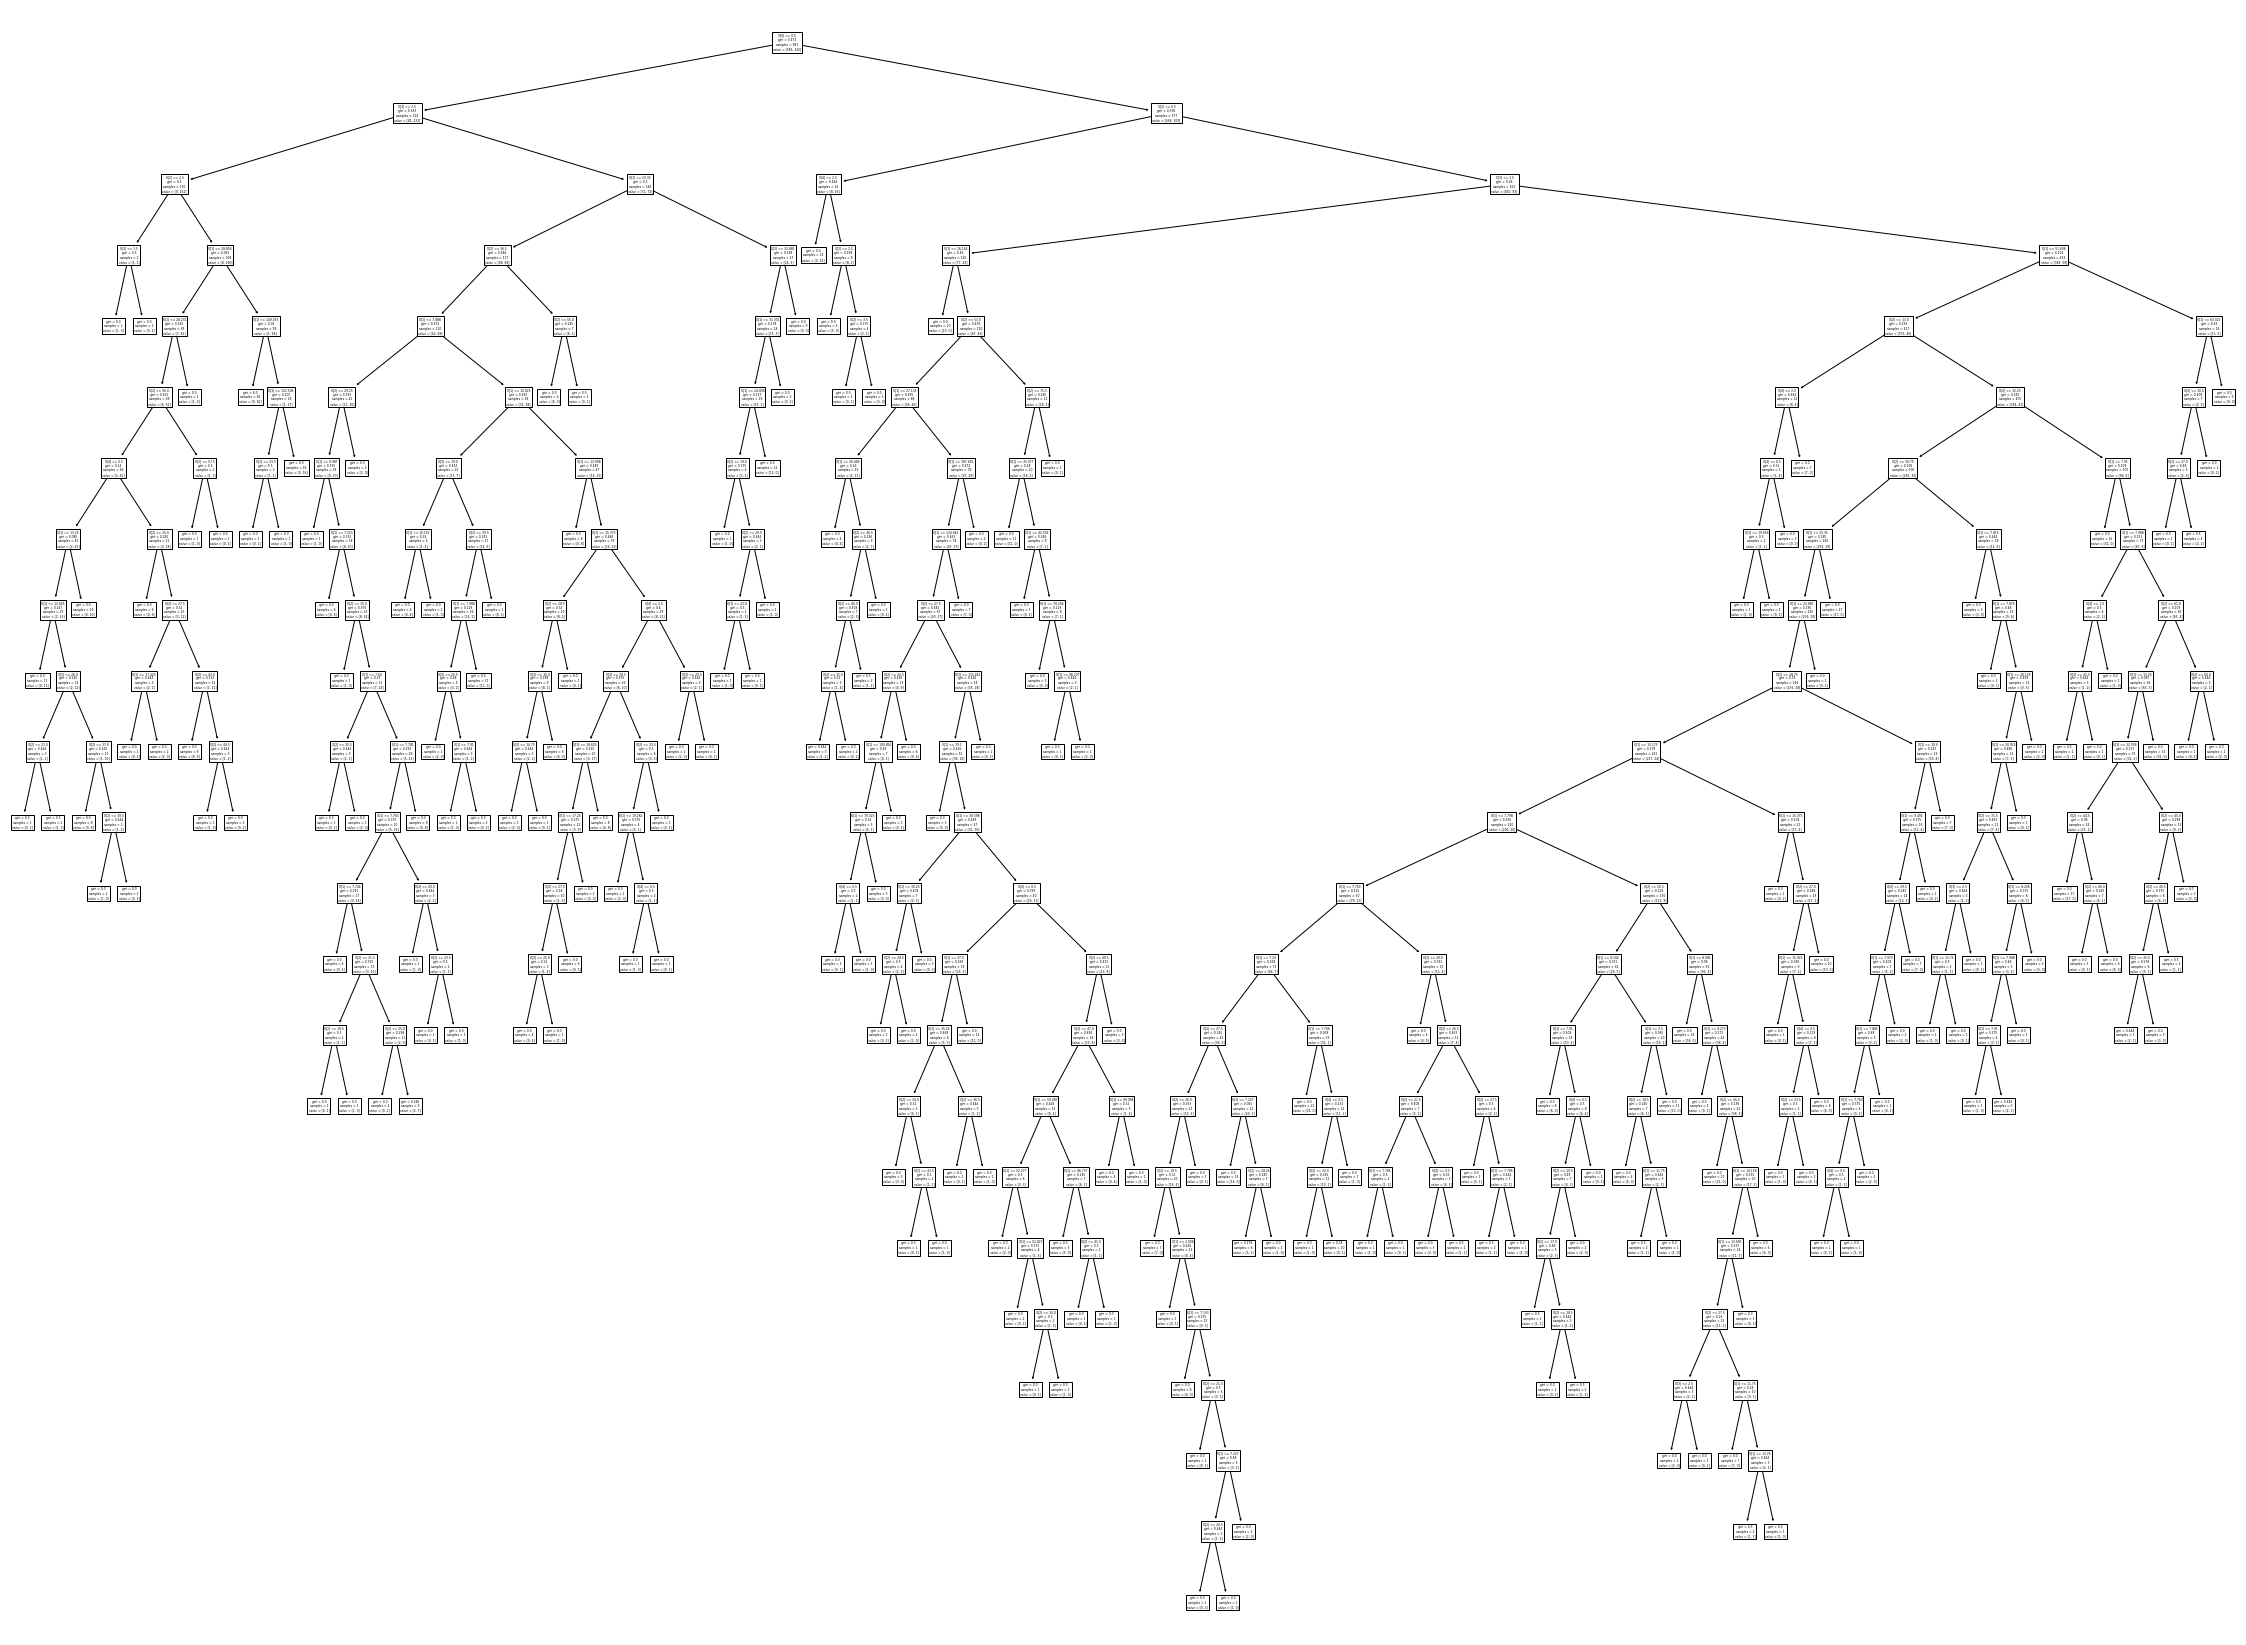

In [68]:
# plot_tree() 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(40,30)) # 보여지는 사이즈
plot_tree(dt)
plt.show()

In [73]:
plt.figure(figsize=(20,15))
plot_tree(dt, max_depth=3, filled=True, feature_names=['Sex_male', 'Fare', 'Age', 'Pclass', 'SibSp'])
plt.show()
# filled=True 노드의 옵션 on , 색상 채움 

NameError: name 'plot_tree' is not defined

<Figure size 1440x1080 with 0 Axes>

In [74]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['Sex_male', 'Fare', 'Age', 'Pclass', 'SibSp'])
plt.show()

NameError: name 'plot_tree' is not defined

<Figure size 720x504 with 0 Axes>

In [80]:
#print(dt.score(X,y))
print(dt.score(X_train,Y_train)

SyntaxError: unexpected EOF while parsing (2660453954.py, line 2)

In [ ]:
# 몰랏기에, 훈련데이터 점수만 가져왔다. 
# 여기에 테스트 점수를 넣고 다시 훈련시켜 넣어야 한다